## Step 1: Initial Data Exploration

### Overview of the Meditation Intervention Dataset

This dataset contains detailed information about various meditation interventions used in research studies. The key columns include:

- **`report_id`** – Unique identifier for each report, allowing linkage across datasets.
- **`study_id`** – Identifies the study under which the intervention was conducted.
- **`treatment_id`** – Unique identifier for each specific meditation or treatment intervention.
- **`t_type`** – Type of intervention (e.g., MBSR, MBCT, or other meditation methods).
- **`t_program`** – The name of the program or meditation course used in the intervention.
- **`t_name`** – Specific title of the intervention as recorded in the study.
- **`t_desc`** – A detailed description of the meditation method applied.
- **`goal`** – The primary aim of the intervention (e.g., stress reduction, increased mindfulness).
- **`format`** – The delivery format (e.g., group, individual, online, or in-person).
- **`practice_type`** – The type of meditation practice used (e.g., breathing exercises, body scan, loving-kindness meditation).
- **`duration`** – The duration of the program (in weeks or days).
- **`medical_needs`** – Specific medical requirements or conditions addressed by the intervention.
- **`intervention_type`** – The category of the intervention (e.g., therapeutic, research-based, educational).

These columns provide critical insights into the **structure of meditation programs, their primary objectives, and the various intervention types**, including **cognitive approaches, mindfulness, and non-conceptual practices**.

---

### Data Overview & Preprocessing

To understand the dataset, we performed an initial exploration using three key functions:

1. **Head**: Displayed the first few rows to examine the overall structure.
2. **Describe**: Provided summary statistics for numerical and categorical variables.
3. **Info**: Displayed data types, non-null counts, and memory usage.

- **First Peek**: The dataset contains details of meditation programs, with fields like `report_id`, `t_desc`, `treatment_type`, and `intervention_type`.
- **Descriptive Statistics**:
  - **Meditation Types**: The dataset includes structured mindfulness-based interventions like MBSR and MBCT.
  - **Most frequent techniques**: Mindfulness, breathing exercises, and body scan are common.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import os

In [21]:
# Install missing packages
try:
    from wordcloud import WordCloud
except ImportError:
    import sys
    !{sys.executable} -m pip install wordcloud

In [10]:
intervention_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\Intervention.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

In [14]:
print(intervention_df.head(15))

    report_id  study_id  treatment_id  t_type  t_program  \
0           1         1             1       1          2   
1           2         2             1       1          1   
2           4         3             1       1          7   
3           5         4             1       1          7   
4           6         5             1       1          7   
5           7         6             1       1          1   
6           8         7             1       1          2   
7           9         8             1       1          7   
8          10         9             1       1          7   
9          11        10             1       2          7   
10         12        11             1       1          2   
11         13        12             1       1          1   
12         14        13             1       1          7   
13         15        14             1       1          1   
14         16        15             1       1          7   

                                       

In [12]:
print(intervention_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   report_id          79 non-null     int64 
 1   study_id           79 non-null     int64 
 2   treatment_id       79 non-null     int64 
 3   t_type             79 non-null     int64 
 4   t_program          79 non-null     int64 
 5   t_name             79 non-null     object
 6   t_desc             79 non-null     object
 7   goal               79 non-null     object
 8   format             79 non-null     object
 9   practice_type      79 non-null     object
 10  duration           79 non-null     object
 11  medical_needs      79 non-null     object
 12  intervention_type  79 non-null     object
dtypes: int64(5), object(8)
memory usage: 8.2+ KB
None


In [13]:
# Check for duplicate rows
duplicates = intervention_df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

Total Duplicate Rows: 0


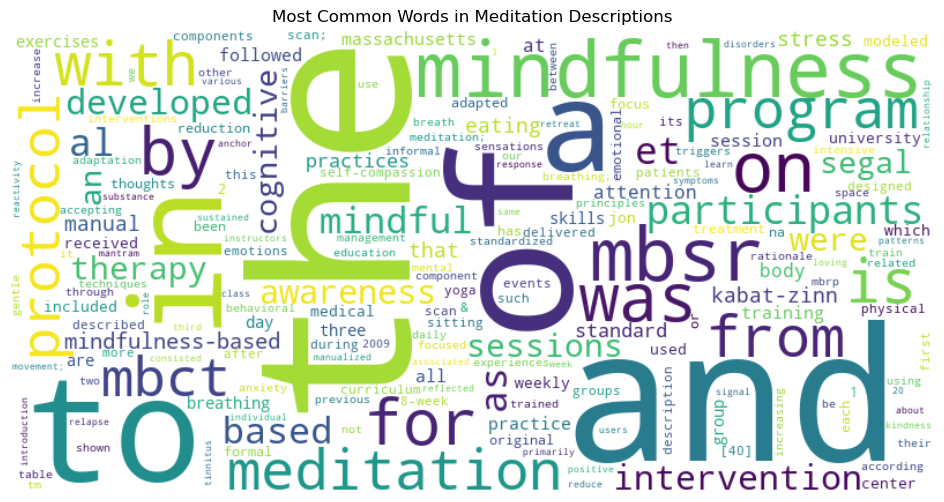

In [23]:
### Step 3: Analyzing Meditation Descriptions

# Combining all descriptions into one text corpus
all_descriptions = " ".join(intervention_df["t_desc"].dropna())

# Tokenization and frequency analysis
words = [word.lower().strip(".,!?()") for word in all_descriptions.split()]
word_freq = Counter(words)

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Meditation Descriptions")
plt.show()

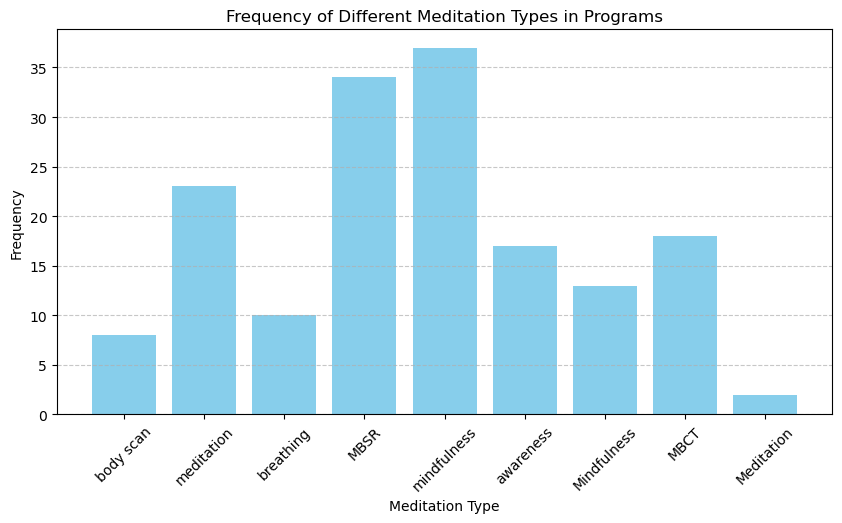

In [24]:
### Step 4: Identifying Different Meditation Types

meditation_keywords = ["mindfulness", "mbsr", "mbct", "meditation", "breathing", "body scan", "awareness"]
pattern = r'\b(?:' + '|'.join(meditation_keywords) + r')\b'

# Searching for occurrences of meditation-related terms
matches = []
for desc in intervention_df["t_desc"].dropna():
    found = re.findall(pattern, desc, flags=re.IGNORECASE)
    matches.extend(found)

meditation_freq = Counter(matches)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(meditation_freq.keys(), meditation_freq.values(), color="skyblue")
plt.xlabel("Meditation Type")
plt.ylabel("Frequency")
plt.title("Frequency of Different Meditation Types in Programs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [30]:
### Step 5: Exploring Compassion and Non-Conceptual Meditation Practices

compassion_keywords = ["compassion", "self-compassion", "loving-kindness", "kindness", "empathy", "care"]
zen_keywords = ["zen", "non-dual", "shikantaza", "silent", "emptiness", "non-conceptual", "open awareness"]

# Searching for occurrences in descriptions
compassion_matches = []
zen_matches = []
study_ids_with_compassion = []
for index, row in intervention_df.dropna(subset=["t_desc"]).iterrows():
    found_compassion = re.findall(r'\b(?:' + '|'.join(compassion_keywords) + r')\b', row["t_desc"], flags=re.IGNORECASE)
    found_zen = re.findall(r'\b(?:' + '|'.join(zen_keywords) + r')\b', row["t_desc"], flags=re.IGNORECASE)
    
    compassion_matches.extend(found_compassion)
    zen_matches.extend(found_zen)
    
    if found_compassion:
        study_ids_with_compassion.append(row["study_id"])

compassion_freq = Counter(compassion_matches)
zen_freq = Counter(zen_matches)

# Display compassion-related results
print("Compassion-related terms frequency:")
print(compassion_freq)

# Display non-conceptual meditation results
if sum(zen_freq.values()) == 0:
    print("No mentions of non-conceptual meditation found in the dataset.")
else:
    print("Non-conceptual meditation terms frequency:")
    print(zen_freq)


Compassion-related terms frequency:
Counter({'self-compassion': 3, 'kindness': 2, 'care': 1, 'compassion': 1, 'Compassion': 1, 'Self-Compassion': 1})
No mentions of non-conceptual meditation found in the dataset.


In [34]:
# Display study IDs where compassion-related words were found
print("Study IDs with compassion-related terms:")
print(set(study_ids_with_compassion))

Study IDs with compassion-related terms:
{32, 71, 41, 13, 48, 24}
